In [51]:
import pandas as pd
import seaborn as sns 

df = pd.read_csv("sentiment_analysis.csv").iloc[:, 1:]
df['date'] = pd.DatetimeIndex(df['date'])
df.head()

,year,month,text,date,sentiment,sentiment_comp
0,2021,1,idk bother alcohol inflation time high rn,2021-01-25 07:57:47,-0.4215,neg
1,2021,1,inflation much money mean price rise eventuall...,2021-01-25 07:57:40,0.0000,pos
2,2021,1,exert daily fix talk inflation roll deafen exu...,2021-01-25 07:57:15,-0.5574,neg
3,2021,1,regard michellin explain recent price rise inf...,2021-01-25 07:57:08,0.0000,pos
4,2021,1,oh mike since clearly unaware inflation level ...,2021-01-25 07:56:55,-0.2732,neg


In [20]:
df.date

0     2021-01-25 07:57:47
1     2021-01-25 07:57:40
2     2021-01-25 07:57:15
3     2021-01-25 07:57:08
4     2021-01-25 07:56:55
              ...        
503   2021-08-25 07:49:17
504   2021-08-25 07:49:14
505   2021-08-25 07:49:08
506   2021-08-25 07:48:43
507   2021-09-25 07:55:06
Name: date, Length: 508, dtype: datetime64[ns]

In [32]:
df.groupby([(df['date'].dt.year), (df['date'].dt.month)])['sentiment_comp']

In [38]:
x = df.groupby([(df['date'].dt.year), (df['date'].dt.month)])['text'].count()
total_tweet_by_month = x.values
total_tweet_by_month

array([15, 96, 20, 18, 34, 77, 36, 51, 28, 59, 18, 56])

In [49]:
y = df.groupby([(df['date'].dt.year), (df['date'].dt.month)])['sentiment'].sum()
x = df.groupby([(df['date'].dt.year), (df['date'].dt.month)])['sentiment'].mean()
# total_tweet_by_month = x.values
# total_tweet_by_month
average_sentiment = x.values
z = [m/n for m, n in zip(y.values, total_tweet_by_month)]
z

[-0.06143333333333333,
 0.09746041666666666,
 0.132015,
 0.26035555555555556,
 0.06966176470588235,
 0.09693506493506493,
 0.02440833333333334,
 -0.022368627450980394,
 -0.07986071428571428,
 0.07255593220338984,
 -0.04740000000000001,
 -0.04725892857142857]

In [50]:
average_sentiment

array([-0.06143333,  0.09746042,  0.132015  ,  0.26035556,  0.06966176,
        0.09693506,  0.02440833, -0.02236863, -0.07986071,  0.07255593,
       -0.0474    , -0.04725893])

In [48]:
total_data = total_tweet_by_month.sum()
total_data

508

In [54]:
import calendar
month_list = list(calendar.month_name)[1:]


/Users/jiong/opt/miniconda3/envs/py38-fni/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


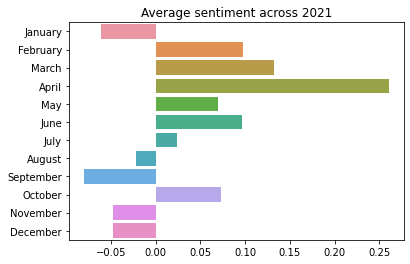

In [59]:
# swarm_plot = sns.swarmplot(...)
# fig = swarm_plot.get_figure()
# fig.savefig("out.png") 

viz = sns.barplot(average_sentiment, month_list).set_title("Average sentiment across 2021")
viz.get_figure().savefig("average_sentiment-2021.png")

In [80]:
df = pd.read_excel("Consumer_Price_Index_CPI.xlsx")
x = [x.replace('2021', '') for x in df.columns[1:].insert(0, "country")]
df.columns = x 
df

,country,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Canada,1.023392,1.091703,2.196193,3.389831,3.600294,3.061224,3.717201,4.087591,4.382761,4.654545,4.720407,4.803493
1,France,0.554812,0.564431,1.109093,1.243305,1.422978,1.479149,1.150299,1.865068,2.161645,2.621759,2.778573,2.753430
2,Germany,1.045627,1.325758,1.702933,1.979265,2.547170,2.345216,3.770028,3.867925,4.064272,4.532578,5.238095,5.308057
3,Italy,0.388727,0.583658,0.777454,1.067961,1.264591,1.263362,1.947420,2.038835,2.541544,3.024390,3.710938,3.898635
4,Japan,-0.696517,-0.498504,-0.398804,-1.097804,-0.699301,-0.400400,-0.300000,-0.399600,0.200200,0.100200,0.603015,0.805639
5,Russian Federation,5.194624,5.666421,5.781998,5.519768,6.014380,6.511564,6.469082,6.692701,7.408057,8.135333,8.403798,8.393000
6,United Kingdom,0.923361,0.736648,1.012891,1.657459,2.209945,2.389706,2.014652,3.033088,2.930403,3.846154,4.582951,4.844607
7,United States,1.399770,1.676215,2.619763,4.159695,4.992707,5.391451,5.365475,5.251272,5.390349,6.221869,6.809003,7.036403


In [84]:
avg_inflation = df.mean(axis=0).values
avg_inflation

/var/folders/4s/qf_5w4sd3_bc6pyrz5jp4hsc0000gn/T/ipykernel_69827/2294467503.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avg_inflation = df.mean(axis=0).values


array([1.2292244 , 1.39329118, 1.85019008, 2.23993484, 2.66909538,
       2.75515911, 3.01676973, 3.30460986, 3.63490406, 4.1421036 ,
       4.60584758, 4.73040812])

In [73]:
df['Jan 2021'].sum()

9.833795192912374

/Users/jiong/opt/miniconda3/envs/py38-fni/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


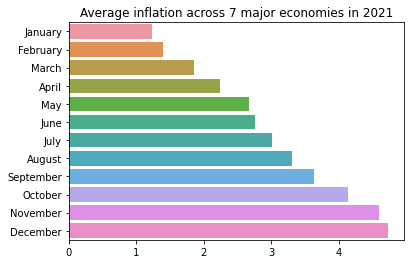

In [89]:
viz = sns.barplot(avg_inflation, month_list).set_title("Average inflation across 7 major economies in 2021")
viz.get_figure().savefig("average_inflation-2021.png", dpi=299)